In [1]:
import random
import csv
import operator

In [2]:
#loading of dataset and dividing it into traing and test sets

In [3]:
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'rt') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [4]:
#calculatinjg distance between two points using euclidean distance formula(similarity)

In [5]:
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2) #to the power of 2
    return math.sqrt(distance)

In [6]:
#finding neighbors (having k neighbour having least distance from point)

In [7]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [8]:
#getting response i.e deciding to which class does it belong to

In [9]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
    return sortedVotes[0][0]

In [10]:
#measuringf accuracy

In [11]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] in predictions[x]: 
            correct = correct + 1
            
    return (correct/float(len(testSet))*100)

In [12]:
#preparation of data and processing it

In [13]:
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.67
    loadDataset('iris.data', split, trainingSet, testSet)
    print ('Train set: ' + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k = 3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
    
main()

Train set: 99
Test set: 51
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-ver

In [14]:
trainingSet=[]
testSet=[]
data=loadDataset('iris.data', 0.67, trainingSet, testSet)

In [15]:
print(repr(trainingSet))

[[4.7, 3.2, 1.3, 0.2, 'Iris-setosa'], [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'], [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'], [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'], [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'], [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'], [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'], [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'], [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'], [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'], [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'], [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'], [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'], [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'], [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'], [5.0, 3.4, 1.6, 0.4, 'Iris-setosa'], [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], [5.2, 4.1, 1.5, 0.1, 'Iris-setosa'], [5.5, 4.2, 1.4, 0.2, 'Iris-setosa'], [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], [5.0, 3.2, 1.2, 0.2, 'Iris-setosa'], [5.5, 3.5, 1.3, 0.2, 'Iris-setosa'], [4.4, 3.0, 1.3, 0.2, 'Iris-setosa'], [5.0, 3.5, 1.3, 0.3, 'Iris-setosa'], [4.4, 3.2, 1.3, 0.2, 'Iris-setosa'], [5.0, 3.5, 1.6, 0.6, 'Iris-setosa'], 

In [20]:
print(testSet)

[[4.7, 3.2, 1.3, 0.2, 'Iris-setosa'], [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'], [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'], [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'], [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'], [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'], [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], [5.4, 3.4, 1.5, 0.4, 'Iris-setosa'], [5.2, 4.1, 1.5, 0.1, 'Iris-setosa'], [5.5, 3.5, 1.3, 0.2, 'Iris-setosa'], [5.0, 3.5, 1.3, 0.3, 'Iris-setosa'], [4.5, 2.3, 1.3, 0.3, 'Iris-setosa'], [4.4, 3.2, 1.3, 0.2, 'Iris-setosa'], [5.1, 3.8, 1.9, 0.4, 'Iris-setosa'], [5.1, 3.8, 1.6, 0.2, 'Iris-setosa'], [4.6, 3.2, 1.4, 0.2, 'Iris-setosa'], [5.3, 3.7, 1.5, 0.2, 'Iris-setosa'], [7.0, 3.2, 4.7, 1.4, 'Iris-versicolor'], [6.9, 3.1, 4.9, 1.5, 'Iris-versicolor'], [5.7, 2.8, 4.5, 1.3, 'Iris-versicolor'], [5.0, 2.0, 3.5, 1.0, 'Iris-versicolor'], [6.1, 2.9, 4.7, 1.4, 'Iris-versicolor'], [6.2, 2.2, 4.5, 1.5, 'Iris-versicolor'], [6.1, 2.8, 4.7, 1.2, 'Iris-versicolor'], [6.4, 2.9, 4.3, 1.3, 'Iris-versicolor'], [5.8,

In [17]:
trainingSet=[]
testSet=[]
data=loadDataset('iris.data', 0.67, trainingSet, testSet)
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
print(neighbors)

[[6.4, 2.7, 5.3, 1.9, 'Iris-virginica'], [6.5, 3.0, 5.5, 1.8, 'Iris-virginica'], [6.7, 3.0, 5.2, 2.3, 'Iris-virginica']]


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import pandas as pd
iris = pd.read_csv("iris.data")

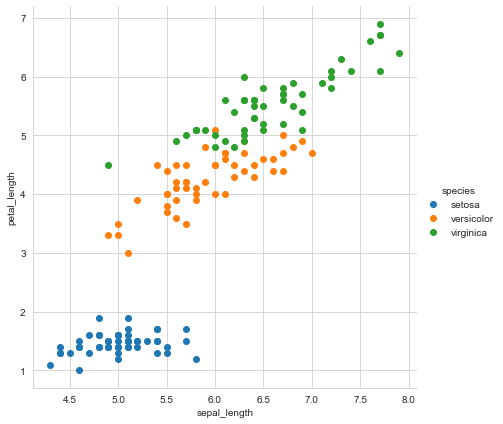

In [29]:
import seaborn as sns

iris = sns.load_dataset('iris')

sns.set_style("whitegrid")

sns.FacetGrid(iris, hue ="species",
            height = 6).map(plt.scatter,
                            'sepal_length',
                            'petal_length').add_legend()


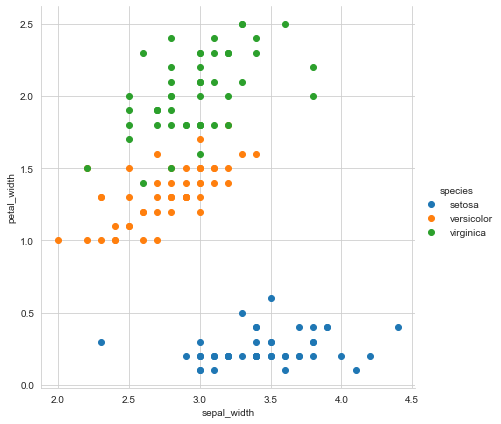

In [30]:
import seaborn as sns

iris = sns.load_dataset('iris')

sns.set_style("whitegrid")

sns.FacetGrid(iris, hue ="species",
            height = 6).map(plt.scatter,
                            'sepal_width',
                            'petal_width').add_legend()